# Jeu de dés

Dans ce notebook, nous reprenons l'exemple vu en cours d'un jeu de $ndes$ dés dont on contraint la somme totale sur les faces. En cours nous avions pris 3 dés et contraint la somme à être égale à 8 ce qui amenait à 21 cas possibles, parmi lesquels 6 ont la face "1" pour le dé 1, 5 ont la face "2" pour le dé 1 etc. On aboutit alors à une probabilité de trouver la face $i$ pour le dé 1 qui décroit en fonction de $i$. Cette décroissance est linéaire dans ce cas. Le but de ce notebook est de montrer que si on augmente le nombre de dés, on aboutit à une décroissance exponentielle, comme pour la loi de Boltzmann. Les dés qui ne sont pas le dé observé jouent le rôle de thermostat. La loi exponentielle est obtenu pour un thermostat grand devant le système observé. C'est ce que nous allons retrouver et on comprend alors que si le thermostat ne contient que 2 dés la loi obtenue soit différente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tools.des as ds

## Tirages d'un jeu aléatoire de configurations des dés avec somme fixe

Ici, on fixe le nombre de dés, $ndes$, la contrainte sur la somme, $somme$ et le nombre de tirages, $ntirages$. 

Il est aussi possible de choisir des dés autres qu'à six faces en donnant le nombre de faces de chaque dé, $nfaces$.

In [137]:
ndes=100
somme=200
nfaces=6
ntirages=10000

La fonction $ds.TiragesDes$ génère alors $ntirages$ configurations des dés avec la contrainte sur la somme des faces et avec une distribution équiprobable sur toutes les configurations compatibles avec cette contrainte.

$somme$ doit vérifier $ndes \le somme \le nfaces\times ndes$, sinon $ds.TiragesDes$ renvoie un message d'erreur.

Le paramètre $npas$ sert à la génération des tirages, la fonction génère en réalité $npas \times ntirages$ configurations à la suite et en extrait une configuration tous les $npas$. Ceci sert à avoir des configurations avec plus de différences entre elles.

In [138]:
tirages=ds.TiragesDes(ndes=ndes,somme=somme,nfaces=nfaces,ntirages=ntirages,npas=100)

On peut faire un histogramme des configurations générées. Chaque barre est indéxée par "i-j-k" où $i$, $j$ et $k$ sont les faces des dés 1, 2 et 3 respectivement. 

On peut tracer cette histogramme avec 4, voire 5 dés, mais s'il y a trop de po

In [144]:
hist=ds.HistogrammeDes(tirages)

if (len(hist) < 50):
    plt.bar(hist.keys(),hist.values())
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("Trop de valeurs pour tracer l'histogramme")

Trop de valeurs pour tracer l'histogramme


## Calcul des probabilités de chaque face pour un dé donné

In [140]:
ds.Proba(tirages,ides=1,nfaces=nfaces)

array([0.4673, 0.2531, 0.1331, 0.074 , 0.045 , 0.0275])

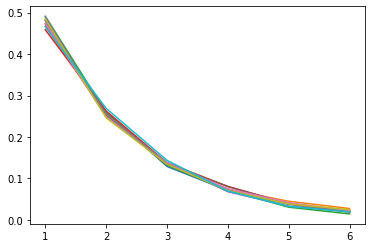

In [141]:
x=np.arange(nfaces)+1

for ides in range(min(10,ndes)):
    plt.plot(x,ds.Proba(tirages,ides,nfaces=nfaces))

plt.show()

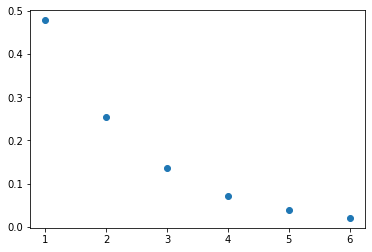

In [142]:
n0,q=ds.BoltzmannParam(somme/ndes,nfaces=nfaces)

ProbaBoltzmann=1/q*np.exp(-x/n0)

plt.plot(x,ProbaBoltzmann,'o')
plt.show()

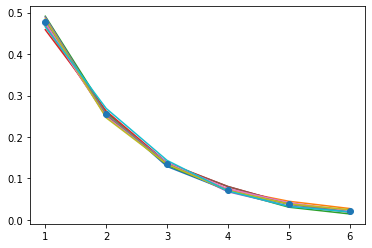

In [143]:
x=np.arange(nfaces)+1

for ides in range(min(10,ndes)):
    plt.plot(x,ds.Proba(tirages,ides,nfaces=nfaces))

n0,q=ds.BoltzmannParam(somme/ndes,nfaces=nfaces)

ProbaBoltzmann=1/q*np.exp(-x/n0)

plt.plot(x,ProbaBoltzmann,'o')

plt.show()